In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn") 

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from collections import namedtuple
from IPython.display import display
from pprint import pprint
from circuit_presets import get_wire_combos
from IPython.core.display import display, HTML
from reporting_functions import (
    get_file_content,
    confusion_matrix_stats,
    get_result_table,
    get_result_table_target_pairs,
    gather_results_0_12,
    get_experiment_config,
    get_model_names,
    plot_loss,
    get_line_plot_data,
    plot_119_accuracy_per_structure,
    gather_results_118_135,
    get_model_result_list,
    get_circuit_diagram,
    get_wire_combos_graph
)
path_experiments = f"{project_home_dir}/experiments"

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

<ipython-input-2-2aaa416ab21c>:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Experiment hep-300
___
Testing out mel frequency image data, with 2 different circuits and 2 different structures
 - **Encoding**: Amplitude
 - **Circuit**: U_TTN / U_5
 - **Target Pair**: *
 - **Scaling**: image_normalize(0,1), image_resize
 - **Feature Selection**: None
 - **Iterations**: 100
 - **batch_size**: 50
 - **cv**: 5 folds
 - **Structures**:{"n_wires": 8,"c_step": 7,"pool_pattern": "right","p_step": 0, "wire_to_cut": 0},{"n_wires": 8,"c_step": 1,"pool_pattern": "eo_even","p_step": 0, "wire_to_cut": 0}
 

In [9]:
from reporting_functions import gather_result_list_1000, plot_triangle_accuracies, get_result_table_target_pairs, gather_results_118_135, get_result_table
exp_id = 350
result_list = gather_result_list_1000(exp_id,path_experiments=path_experiments)
result_data = gather_results_118_135(exp_id, path_experiments=path_experiments)

/home/matt/dev/projects/quantum-cnn/env_test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/env_test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/env_test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [14]:
result_table = get_result_table(result_data,["additional_structure_str","target_pair_str" ],"accuracy")
result_table

target_pair_str,blues_disco,blues_metal,blues_reggae,classical_blues,classical_country,classical_disco,classical_hiphop,classical_jazz,classical_metal,classical_pop,...,pop_metal,pop_reggae,rock_blues,rock_disco,rock_hiphop,rock_jazz,rock_metal,rock_pop,rock_reggae,additional_structure_str Average
additional_structure_str,,,,,,,,,,,,,,,,,,,,,
"U_5_psatz1_{'n_wires': 8, 'c_step': 1, 'pool_pattern': 'eo_even', 'p_step': 0, 'wire_to_cut': 0}",0.641791,0.753846,0.576923,0.590164,0.701754,0.808824,0.745098,0.656250,0.909091,0.742424,...,0.642857,0.578947,0.590164,0.455882,0.490196,0.640625,0.666667,0.469697,0.622642,0.630253
"U_5_psatz1_{'n_wires': 8, 'c_step': 7, 'pool_pattern': 'right', 'p_step': 0, 'wire_to_cut': 0}",0.656716,0.784615,0.557692,0.770492,0.789474,0.794118,0.941176,0.687500,0.954545,0.818182,...,0.714286,0.543860,0.573770,0.573529,0.509804,0.640625,0.757576,0.560606,0.528302,0.658856
"U_TTN_psatz1_{'n_wires': 8, 'c_step': 1, 'pool_pattern': 'eo_even', 'p_step': 0, 'wire_to_cut': 0}",0.626866,0.800000,0.576923,0.704918,0.543860,0.500000,0.647059,0.484375,0.924242,0.606061,...,0.557143,0.614035,0.491803,0.500000,0.588235,0.484375,0.500000,0.469697,0.603774,0.565527
"U_TTN_psatz1_{'n_wires': 8, 'c_step': 7, 'pool_pattern': 'right', 'p_step': 0, 'wire_to_cut': 0}",0.582090,0.861538,0.519231,0.672131,0.842105,0.794118,0.764706,0.609375,0.954545,0.787879,...,0.771429,0.526316,0.573770,0.529412,0.705882,0.671875,0.742424,0.545455,0.509434,0.649093
target_pair_str Average,0.626866,0.800000,0.557692,0.684426,0.719298,0.724265,0.774510,0.609375,0.935606,0.738636,...,0.671429,0.565789,0.557377,0.514706,0.573529,0.609375,0.666667,0.511364,0.566038,0.625932


In [33]:
result_data["additional_structure"][160]

('U_TTN',
 'psatz1',
 {'n_wires': 8,
  'c_step': 1,
  'pool_pattern': 'eo_even',
  'p_step': 0,
  'wire_to_cut': 0})

In [29]:
filter_struc = lambda data, ind, val: data.apply(
        lambda row: row["additional_structure"][ind] == val, axis=1
    )
UTTN_right = result_data[
        filter_struc(result_data, 0, "U_TTN") & filter_struc(result_data, 2, {'n_wires': 8, 'c_step': 7, 'pool_pattern': 'right', 'p_step': 0, 'wire_to_cut': 0})
    ].copy()
UTTN_eo = result_data[
        filter_struc(result_data, 0, "U_TTN") & filter_struc(result_data, 2, {'n_wires': 8, 'c_step': 1, 'pool_pattern': 'eo_even', 'p_step': 0, 'wire_to_cut': 0})
    ].copy()
U_5_right = result_data[
        filter_struc(result_data, 0, "U_5") & filter_struc(result_data, 2, {'n_wires': 8, 'c_step': 7, 'pool_pattern': 'right', 'p_step': 0, 'wire_to_cut': 0})
    ].copy()
U_5_eo = result_data[
        filter_struc(result_data, 0, "U_5") & filter_struc(result_data, 2, {'n_wires': 8, 'c_step': 1, 'pool_pattern': 'eo_even', 'p_step': 0, 'wire_to_cut': 0})
    ].copy()

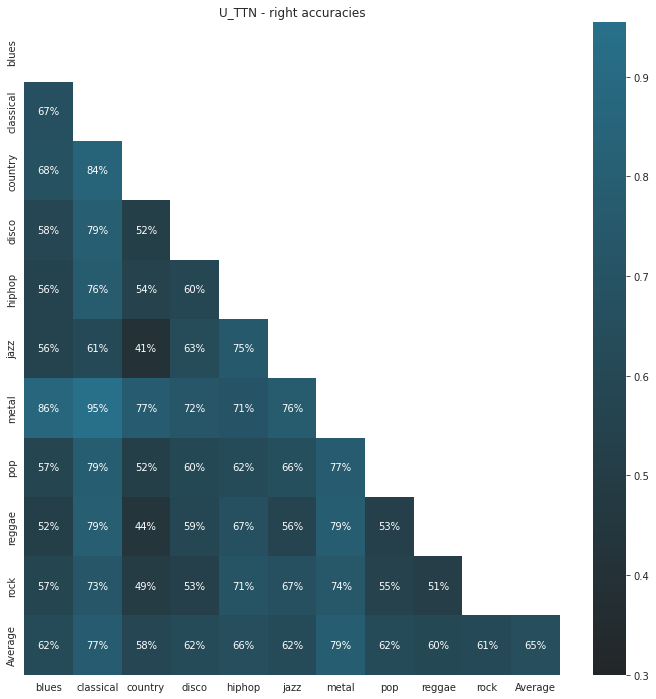

In [36]:
pair_data = get_result_table_target_pairs(
    UTTN_right, "algorithm", "target_pair_str", "accuracy"
)
figsize = (12, 12)
plot_data = pair_data.fillna(1)
plt = plot_triangle_accuracies(plot_data, figsize, title="U_TTN - right accuracies")
plt.savefig('quantum_best_10_pair.svg')

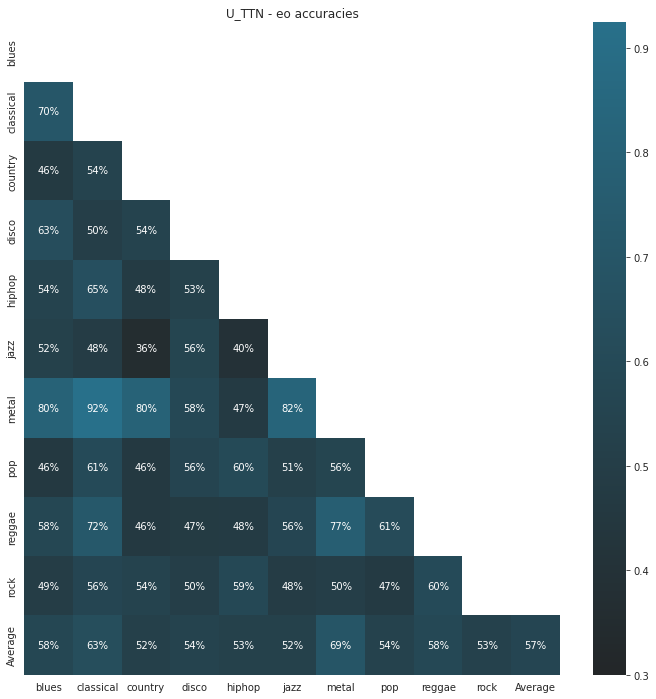

In [37]:
pair_data = get_result_table_target_pairs(
    UTTN_eo, "algorithm", "target_pair_str", "accuracy"
)
figsize = (12, 12)
plot_data = pair_data.fillna(1)
plt = plot_triangle_accuracies(plot_data, figsize, title="U_TTN - eo accuracies")
plt.savefig('quantum_best_10_pair.svg')

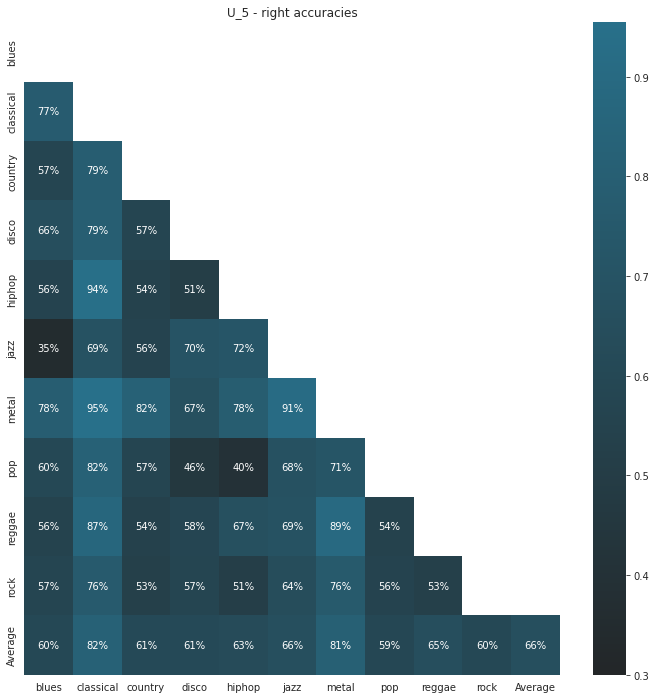

In [38]:
pair_data = get_result_table_target_pairs(
    U_5_right, "algorithm", "target_pair_str", "accuracy"
)
figsize = (12, 12)
plot_data = pair_data.fillna(1)
plt = plot_triangle_accuracies(plot_data, figsize, title="U_5 - right accuracies")
plt.savefig('quantum_best_10_pair.svg')

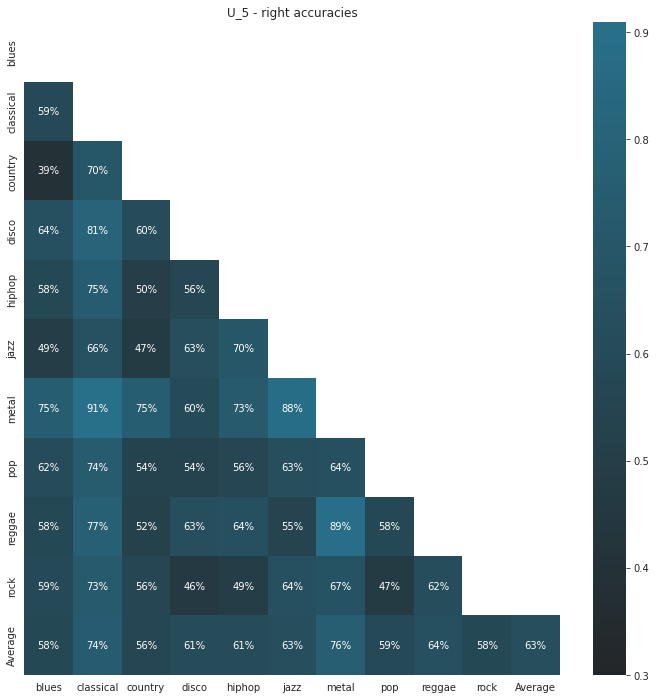

In [39]:
pair_data = get_result_table_target_pairs(
    U_5_eo, "algorithm", "target_pair_str", "accuracy"
)
figsize = (12, 12)
plot_data = pair_data.fillna(1)
plt = plot_triangle_accuracies(plot_data, figsize, title="U_5 - eo accuracies")
plt.savefig('quantum_best_10_pair.svg')